### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [20]:
data = pd.read_csv('data/coupons.csv')

In [21]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

<Figure size 1000x600 with 0 Axes>

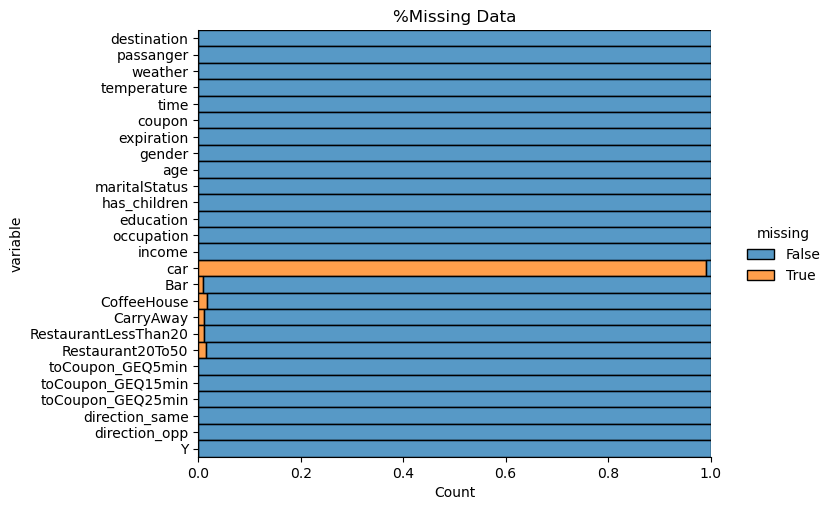

In [24]:
#Plot the missing data
plt.figure(figsize=(10,6))
sns.displot(
    data=data.isna().melt(value_name='missing'),
    y='variable',
    hue='missing',
    multiple='fill',
    aspect=1.5) \
    .set (title = '%Missing Data');

* Field 'car' is missing most data and may not be relevent

In [25]:
#The following library shows the heatmap of the variables w missing data
%pip install missingno

Note: you may need to restart the kernel to use updated packages.


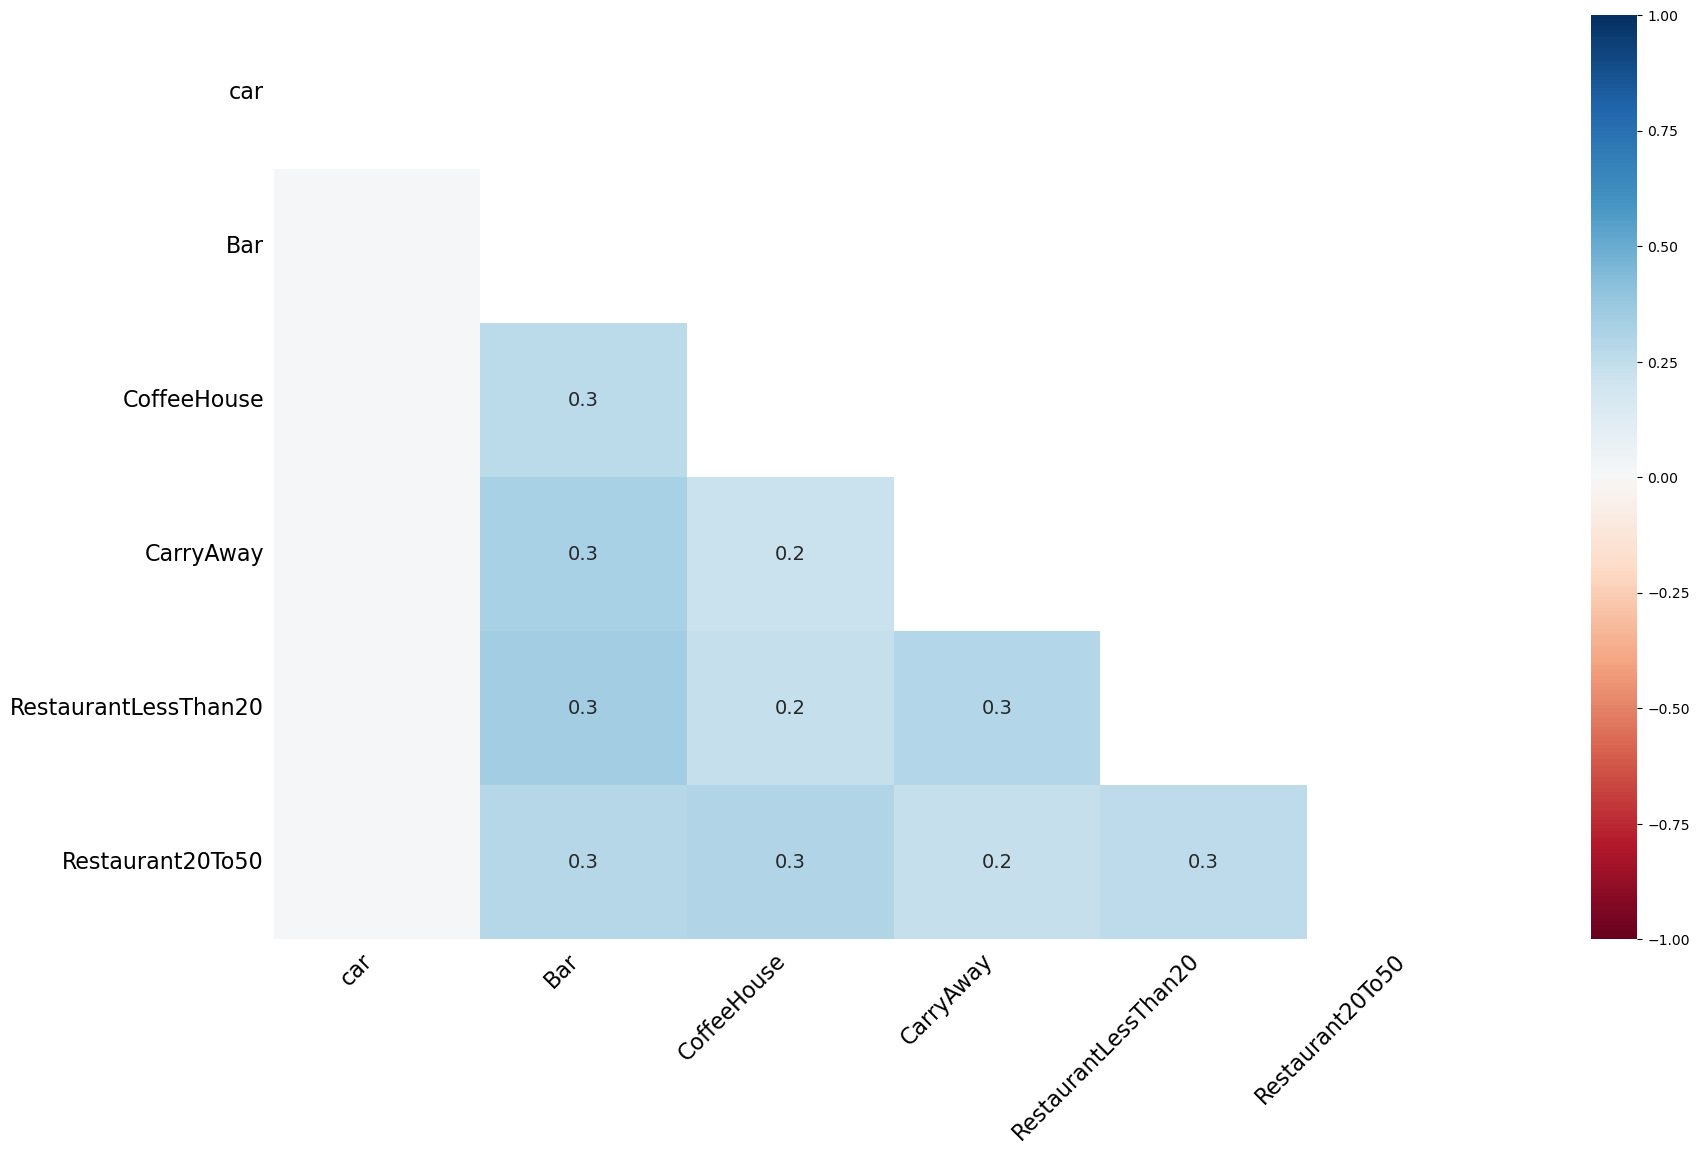

In [27]:
import missingno as msno
msno.heatmap(data);

## The variable 'car' shows now correlation w any other variable

In [28]:
#Find duplicated data
data.loc[data.duplicated(keep=False), :]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4191,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,less1,less1,1,1,1,0,1,1
4192,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,less1,less1,1,1,1,0,1,1
4235,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,gt8,gt8,4~8,less1,1,1,1,0,1,1
4236,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,gt8,gt8,4~8,less1,1,1,1,0,1,1
4279,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,26,Single,...,never,4~8,1~3,less1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,Home,Alone,Sunny,80,6PM,Bar,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,0,0,1,0,1
8512,Home,Partner,Sunny,30,10PM,Carry out & Take away,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,0,0,1,1
8513,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0
8515,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0


3. Decide what to do about your missing data -- drop, replace, other...

In [29]:
# The duplicates seem to be exact duplicates so we can go ahead and drop duplicates
data.drop_duplicates(inplace = True)

In [30]:
# We can also drop the 'car' clomun
data.drop(['car'], axis = 1, inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12610 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  Bar                   12503 non-null  object
 15  CoffeeHouse           12393 non-null

4. What proportion of the total observations chose to accept the coupon? 



In [31]:
p = round((data.query('Y == 1').shape[0]/data.shape[0])*100,2)
print('Overall Coupon Acceptance: %' , p )

Overall Coupon Acceptance: % 56.76


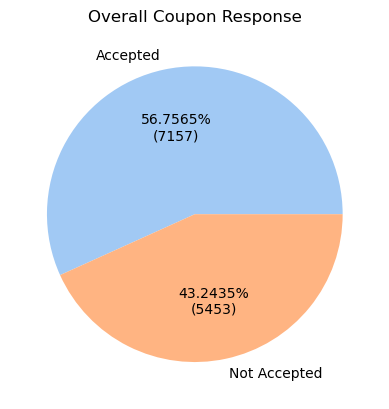

In [32]:
def my_fmt(x):
    return '{:.4f}%\n({:.0f})'.format(x, total*x/100)

row_names = {0 :'Not Accepted',1 :'Accepted'}
colors = sns.color_palette('pastel')[0:5]

v_counts = data.Y.value_counts().rename(index = row_names)
total = len(data)

#create pie chart
plt.pie(v_counts, labels=v_counts.index, colors = colors, autopct=my_fmt)
plt.title('Overall Coupon Response')
plt.show()

5. Use a bar plot to visualize the `coupon` column.

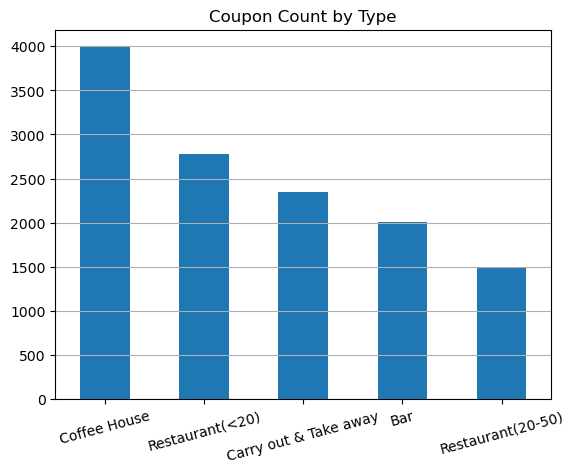

In [40]:
data.coupon.value_counts().plot(kind='bar', title = 'Coupon Count by Type')
plt.grid(axis = 'y', )
plt.xticks(rotation = 15);

In [38]:
data.coupon.value_counts().reset_index()

,index,coupon
0,Coffee House,3989
1,Restaurant(<20),2779
2,Carry out & Take away,2344
3,Bar,2010
4,Restaurant(20-50),1488


6. Use a histogram to visualize the temperature column.

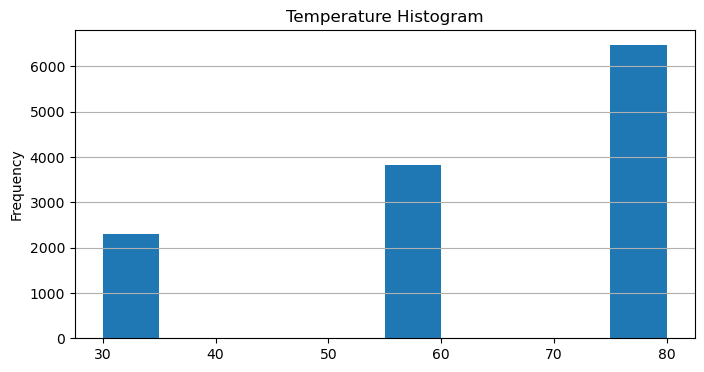

In [42]:
plt.figure(figsize=(8, 4))
data.temperature.plot(kind='hist', title = 'Temperature Histogram')
plt.grid(axis = 'y', );

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [43]:
bar_coupons = data.query('coupon == "Bar"')
bar_coupons

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [44]:
p = round((bar_coupons.query('Y == 1').shape[0]/bar_coupons.shape[0])*100,2)
print('Bar Coupon Acceptance: %' , p )

Bar Coupon Acceptance: % 41.0


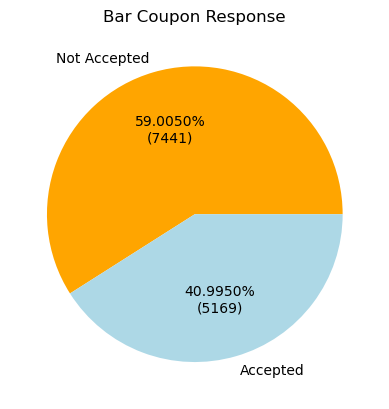

In [55]:
v_counts =bar_coupons.Y.value_counts().rename(index = row_names)
total = len(data)

#create pie chart
labels = ['Not Accepted', 'Accepted']
colours = {'Not Accepted': 'orange', 'Accepted': 'lightblue'}

plt.pie(v_counts, labels=v_counts.index, colors = [colours[key] for key in labels], autopct=my_fmt)
plt.title('Bar Coupon Response')
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [58]:
#List of Bar goer categorya
bar_coupons.Bar.value_counts()

never    830
less1    563
1~3      397
4~8      150
gt8       49
Name: Bar, dtype: int64

In [59]:
filter = ["never", "less1", "1~3"]
bar_filtered = bar_coupons.query('Bar == @filter')
p = round((bar_filtered.query('Y == 1').shape[0]/bar_filtered.shape[0])*100,2)
print('Bar Coupon Acceptance rate for 3 or fewer times per month drivers: %' , p )

Bar Coupon Acceptance rate for 3 or fewer times per month drivers: % 37.04


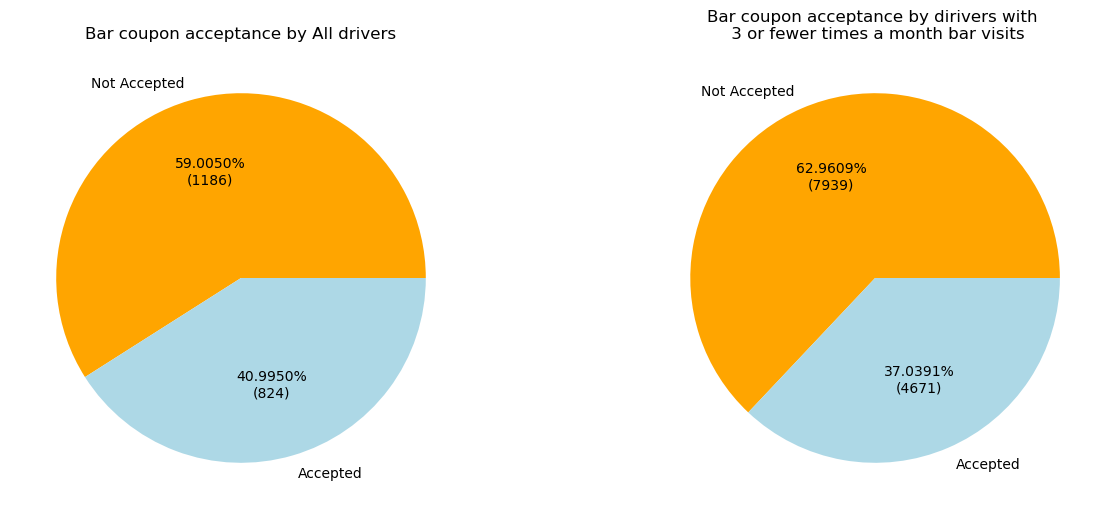

In [60]:
#Plot both pie charts side by side
def my_fmt(x):
    return '{:.4f}%\n({:.0f})'.format(x, total*x/100)

row_names = {0 :'Not Accepted',1 :'Accepted'}

v_counts = bar_coupons.Y.value_counts().rename(index = row_names)
total = len(bar_coupons)

labels = ['Not Accepted', 'Accepted']
colours = {'Not Accepted': 'orange', 'Accepted': 'lightblue'}

plt.figure(figsize=(15, 6))

plt.subplot(121)
#create pie chart
plt.pie(v_counts, labels=v_counts.index, colors = [colours[key] for key in labels], autopct=my_fmt)
plt.title('Bar coupon acceptance by All drivers')

plt.subplot(122)
v_counts = bar_filtered.Y.value_counts().rename(index = row_names)
total = len(data)

#create pie chart
plt.pie(v_counts, labels=v_counts.index, colors = [colours[key] for key in labels], autopct=my_fmt)
plt.title('Bar coupon acceptance by dirivers with \n 3 or fewer times a month bar visits');

In [61]:
#List of All drivers
all_bar_goers = bar_coupons.Y.value_counts(normalize='index').reset_index().rename(columns= {"Y" : "All"})

filter = ["never", "less1", "1~3"]

#List of All drivers who went to a bar 3 or fewer times a month
bar_filtered = bar_coupons.query('Bar == @filter').Y.value_counts(normalize='index').reset_index().rename(columns= {"Y" : "Filtered"})

#Merge both dataframe
df = pd.merge( all_bar_goers, bar_filtered, how = 'inner', on = 'index')

#Prepare the data for plotting
df = df[['All','Filtered']].transpose().rename(columns= {0 : 'Not Accepted', 1 : 'Accepted'})
df

,Not Accepted,Accepted
All,0.590050,0.409950
Filtered,0.629609,0.370391


<Figure size 800x400 with 0 Axes>

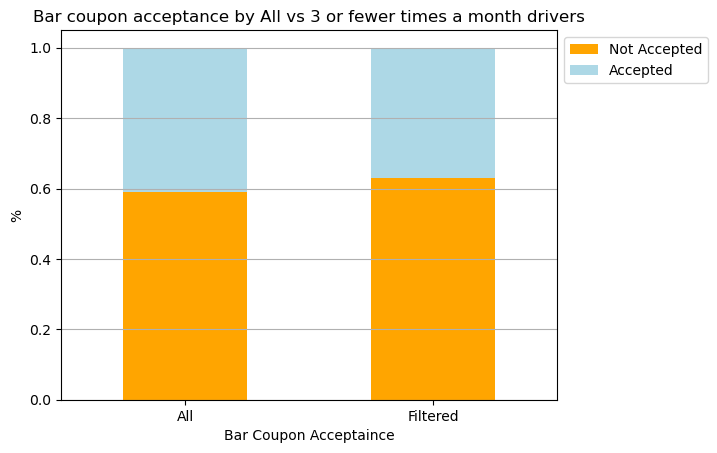

In [73]:
#Plot the Coupon acceptance
plt.figure(figsize=(8, 4))
colours = {'Not Accepted': 'orange', 'Accepted': 'lightblue'}

ax = df.plot(kind = 'bar', stacked = True, color = [colours[key] for key in labels])
plt.xticks(rotation = 0)
ax.set_xlabel('Bar Coupon Acceptaince')
ax.set_ylabel('%')
ax.legend(bbox_to_anchor=(1, 1))
plt.grid(axis = 'y' )
plt.title('Bar coupon acceptance by All vs 3 or fewer times a month drivers');

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [75]:
bar_coupons.age.value_counts()

21         417
26         395
31         336
50plus     283
36         209
41         178
46         105
below21     87
Name: age, dtype: int64

Text(0.5, 1.0, 'Bar coupon acceptance by drivers with \n more than once a month bar visit \n and over the age of 25')

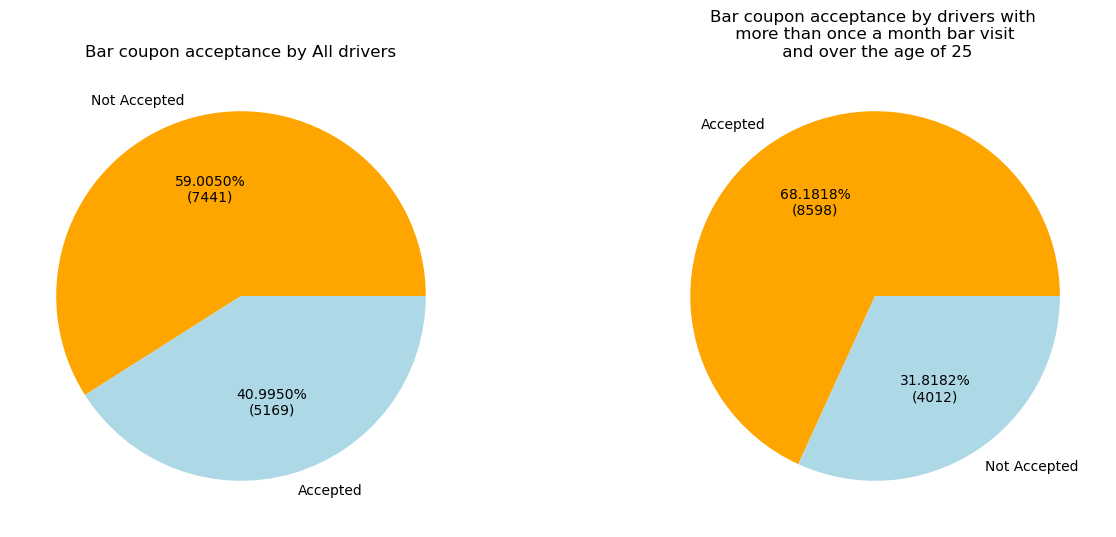

In [77]:
#Plot both pie charts side by side

plt.figure(figsize=(15, 6))
labels = ['Not Accepted', 'Accepted']
colours = {'Not Accepted': 'orange', 'Accepted': 'lightblue'}

plt.subplot(121)

#create pie chart
colors = sns.color_palette('pastel')[0:5]
v_counts = bar_coupons.Y.value_counts().rename(index = row_names)
plt.pie(v_counts, labels=v_counts.index, colors = [colours[key] for key in labels], autopct=my_fmt)
plt.title('Bar coupon acceptance by All drivers')

plt.subplot(122)

#List of All drivers who went to a bar 3 or fewer times a month
filter1 = ["21","below21"]
filter2 = ["never", "less1"]
bar_filtered = bar_coupons.query('age != @filter1 and Bar != @filter2')

v_counts = bar_filtered.Y.value_counts().rename(index = row_names)

#create pie chart
plt.pie(v_counts, labels=v_counts.index, colors = [colours[key] for key in labels], autopct=my_fmt)
plt.title('Bar coupon acceptance by drivers with \n more than once a month bar visit \n and over the age of 25')

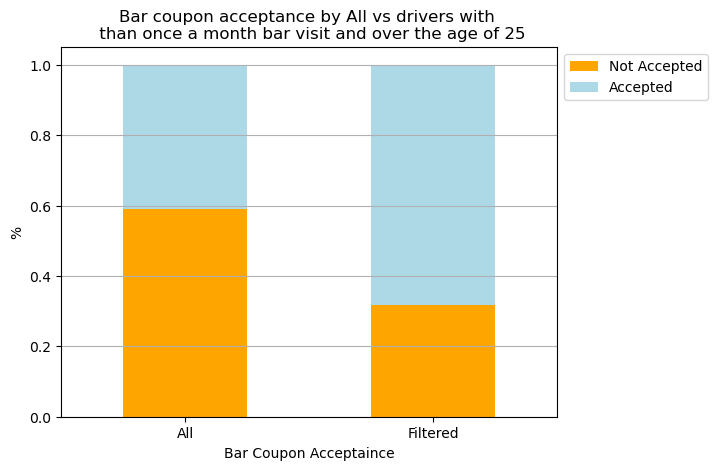

In [78]:
#List of All drivers who went to a bar 3 or fewer times a month
bar_filtered_count = bar_coupons.query('age != @filter1 and Bar != @filter2').Y.value_counts(normalize='index').reset_index().rename(columns= {"Y" : "Filtered"})

#Merge both dataframe
df = pd.merge( all_bar_goers, bar_filtered_count, how = 'inner', on = 'index')
df = df[['All','Filtered']].transpose().rename(columns= {0 : 'Not Accepted', 1 : 'Accepted'})

#Plot the Coupon acceptance

colours = {'Not Accepted': 'orange', 'Accepted': 'lightblue'}
ax = df.plot(kind = 'bar', stacked=True, color = [colours[key] for key in labels])
plt.xticks(rotation = 0)
ax.set_xlabel('Bar Coupon Acceptaince')
ax.set_ylabel('%')
ax.legend(bbox_to_anchor=(1, 1))
plt.grid(axis = 'y')
plt.title('Bar coupon acceptance by All vs drivers with \n than once a month bar visit and over the age of 25');

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [79]:
bar_coupons.passanger.value_counts()

Alone        1198
Friend(s)     335
Partner       273
Kid(s)        204
Name: passanger, dtype: int64

In [80]:
bar_coupons.occupation.value_counts()

Unemployed                                   301
Student                                      251
Computer & Mathematical                      229
Sales & Related                              178
Education&Training&Library                   140
Management                                   115
Office & Administrative Support              105
Arts Design Entertainment Sports & Media     100
Business & Financial                          89
Retired                                       75
Food Preparation & Serving Related            48
Community & Social Services                   44
Healthcare Support                            44
Healthcare Practitioners & Technical          41
Transportation & Material Moving              35
Legal                                         34
Architecture & Engineering                    27
Personal Care & Service                       27
Protective Service                            27
Construction & Extraction                     24
Life Physical Social

In [104]:
bar_coupons.Y.value_counts().rename(index = row_names).key

AttributeError: 'Series' object has no attribute 'key'

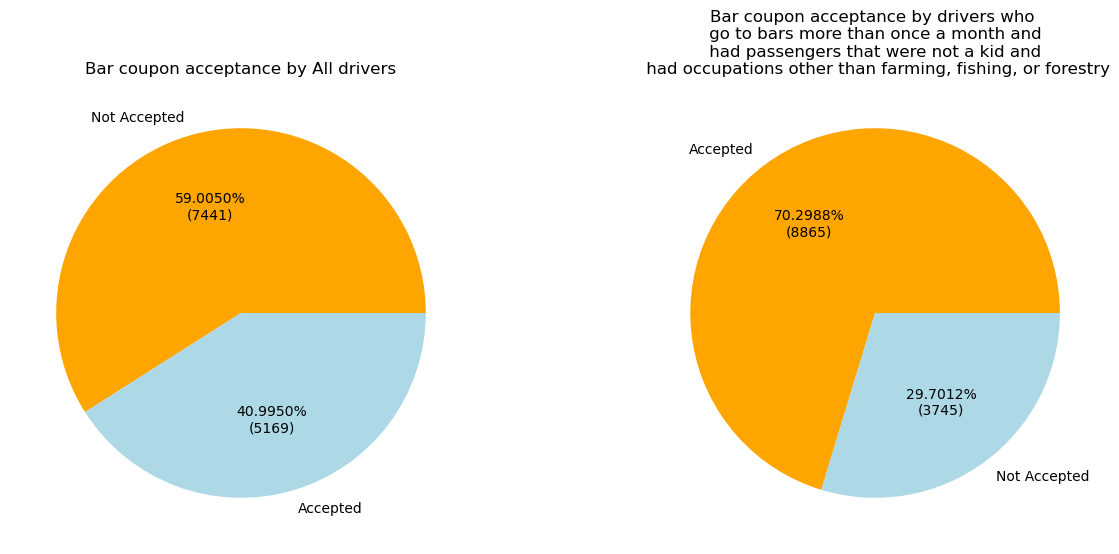

In [108]:
#Plot both pie charts side by side

labels = ['Not Accepted', 'Accepted']
colours = {'Not Accepted': 'orange', 'Accepted': 'lightblue'}

plt.figure(figsize=(15, 6))
colors = sns.color_palette('pastel')[0:5]
plt.subplot(121)
#create pie chart
v_counts = bar_coupons.Y.value_counts().rename(index = row_names)
plt.pie(v_counts, labels=v_counts.index, colors = [colours[keys] for keys in labels], autopct=my_fmt)
plt.title('Bar coupon acceptance by All drivers')

plt.subplot(122)

#List of All drivers who went to a bar 3 or fewer times a month
filter1 = ["never", "less1"]
filter2 = ["Kid(s)"]
filter3 = ["Farming Fishing & Forestry"]
bar_filtered = bar_coupons.query('Bar != @filter1 and passanger != @filter2 and occupation != @filter3')

v_counts = bar_filtered.Y.value_counts().rename(index = row_names)

#create pie chart
plt.pie(v_counts, labels=v_counts.index, colors = [colours[keys] for keys in labels], autopct=my_fmt)
plt.title('Bar coupon acceptance by drivers who \n go to bars more than once a month and \n had passengers that were not a kid and \n had occupations other than farming, fishing, or forestry');

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [109]:
bar_coupons.maritalStatus.value_counts()

Married partner      875
Single               661
Unmarried partner    378
Divorced              75
Widowed               21
Name: maritalStatus, dtype: int64

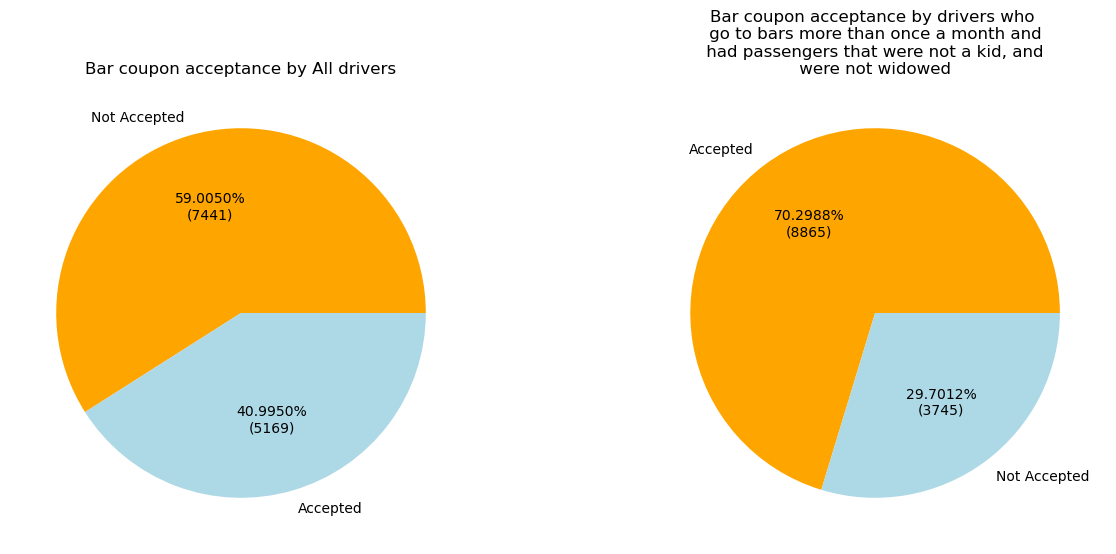

In [110]:
#Plot both pie charts side by side

plt.figure(figsize=(15, 6))
labels = ['Not Accepted', 'Accepted']
colours = {'Not Accepted': 'orange', 'Accepted': 'lightblue'}

plt.subplot(121)
#create pie chart
v_counts = bar_coupons.Y.value_counts().rename(index = row_names)
plt.pie(v_counts, labels=v_counts.index, colors = [colours[key] for key in labels], autopct=my_fmt)
plt.title('Bar coupon acceptance by All drivers')

plt.subplot(122)

#List of All drivers who went to a bar 3 or fewer times a month
filter1 = ["never", "less1"]
filter2 = ["Kid(s)"]
filter3 = ["Widowed"]
bar_filtered = bar_coupons.query('Bar != ["never", "less1"] and passanger != "Kid(s)" and maritalStatus != "Widowed"')

v_counts = bar_filtered.Y.value_counts().rename(index = row_names)

#create pie chart
plt.pie(v_counts, labels=v_counts.index, colors = [colours[key] for key in labels], autopct=my_fmt)
plt.title('Bar coupon acceptance by drivers who \n go to bars more than once a month and \n had passengers that were not a kid, and \n were not widowed ');

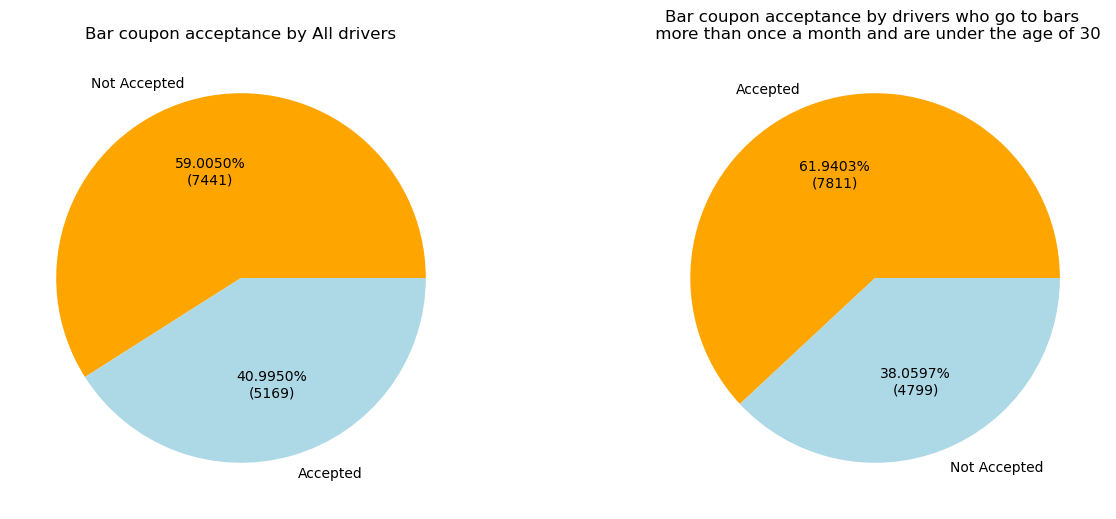

In [113]:
#Plot both pie charts side by side

plt.figure(figsize=(15, 6))
labels = ['Not Accepted', 'Accepted']
colours = {'Not Accepted': 'orange', 'Accepted': 'lightblue'}

plt.subplot(121)
#create pie chart
v_counts = bar_coupons.Y.value_counts().rename(index = row_names)
plt.pie(v_counts, labels=v_counts.index, colors = [colours[key] for key in labels], autopct=my_fmt)
plt.title('Bar coupon acceptance by All drivers')

plt.subplot(122)

#List of All drivers who went to a bar 3 or fewer times a month
filter1 = ["26","21","below21"]
filter2 = ["never", "less1"]
filter3 = ["Widowed"]
bar_filtered = bar_coupons.query('age != @filter1 and Bar != @filter2')

v_counts = bar_filtered.Y.value_counts().rename(index = row_names)

#create pie chart
plt.pie(v_counts, labels=v_counts.index, colors = [colours[key] for key in labels], autopct=my_fmt)
plt.title('Bar coupon acceptance by drivers who go to bars \n more than once a month and are under the age of 30');

### Go to cheap restaurants more than 4 times a month and income is less than 50K.

In [114]:
bar_coupons.RestaurantLessThan20.value_counts()

1~3      878
4~8      565
less1    321
gt8      186
never     37
Name: RestaurantLessThan20, dtype: int64

In [115]:
data.coupon.value_counts()

Coffee House             3989
Restaurant(<20)          2779
Carry out & Take away    2344
Bar                      2010
Restaurant(20-50)        1488
Name: coupon, dtype: int64

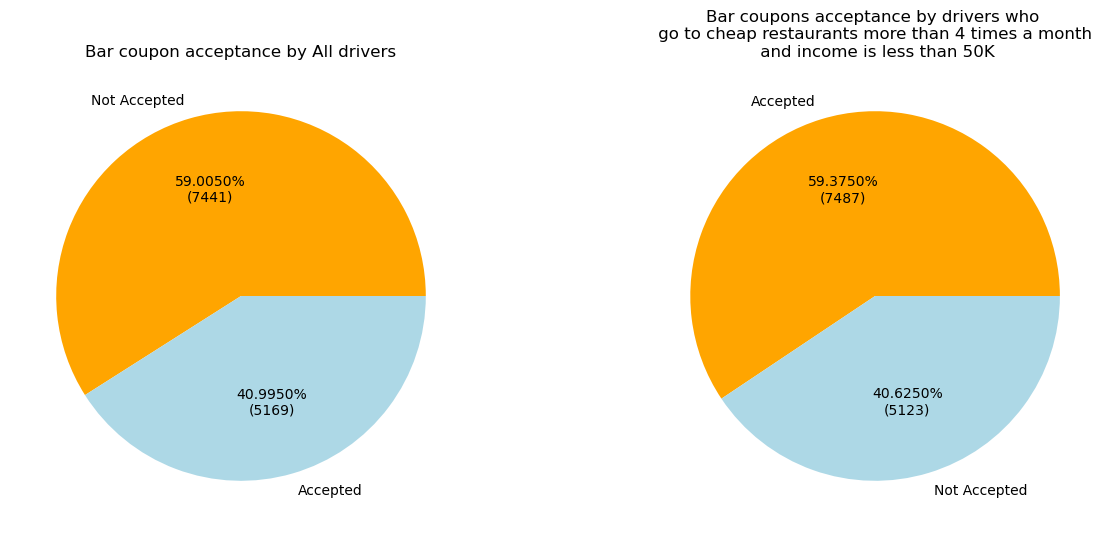

In [116]:
#Plot both pie charts side by side

plt.figure(figsize=(15, 6))
labels = ['Not Accepted', 'Accepted']

plt.subplot(121)
#create pie chart
v_counts = bar_coupons.Y.value_counts().rename(index = row_names)
plt.pie(v_counts, labels=v_counts.index, colors = [colours[key] for key in labels], autopct=my_fmt)
plt.title('Bar coupon acceptance by All drivers')

plt.subplot(122)

#List of All drivers who went to a bar 3 or fewer times a month
filter1 = ["4-8","gt8"]
filter2 = ["$25000 - $37499", "$12500 - $24999", "$37500 - $49999", "Less than $12500"]
bar_filtered = bar_coupons.query('RestaurantLessThan20 == @filter1 and income == @filter2')

v_counts = bar_filtered .Y.value_counts().rename(index = row_names)

#create pie chart
plt.pie(v_counts, labels=v_counts.index, colors = [colours[key] for key in labels], autopct=my_fmt)
plt.title('Bar coupons acceptance by drivers who \n go to cheap restaurants more than 4 times a month \n and income is less than 50K');

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

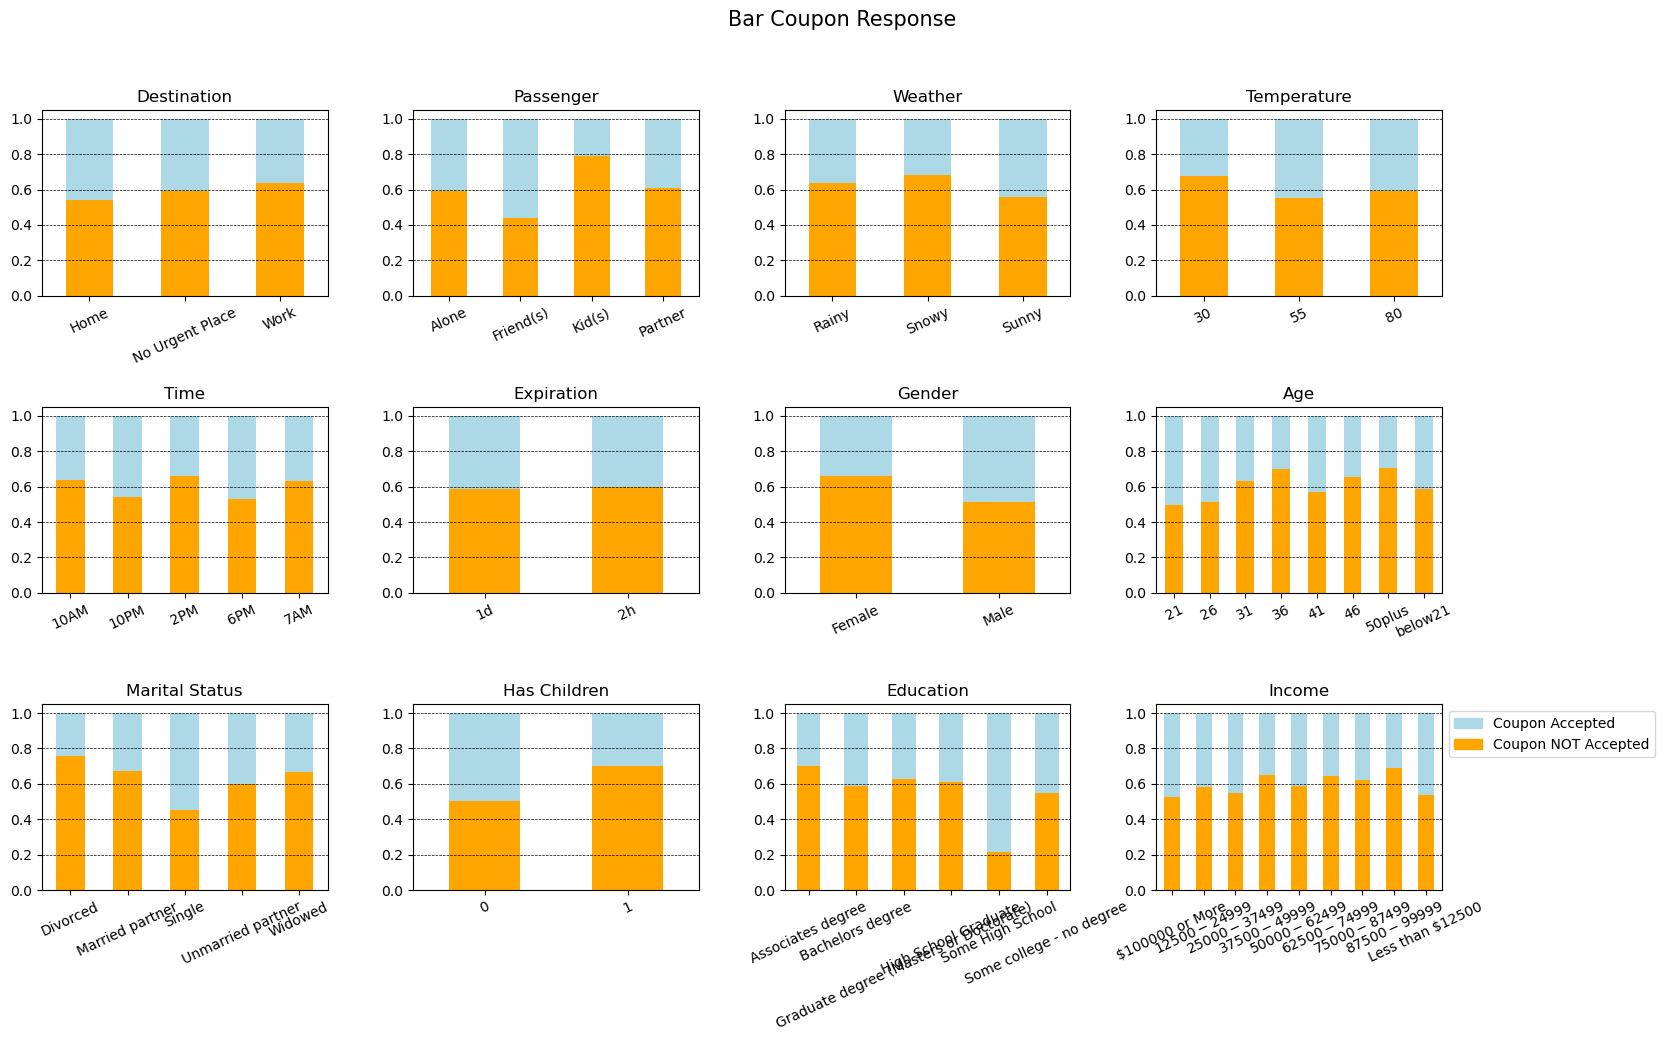

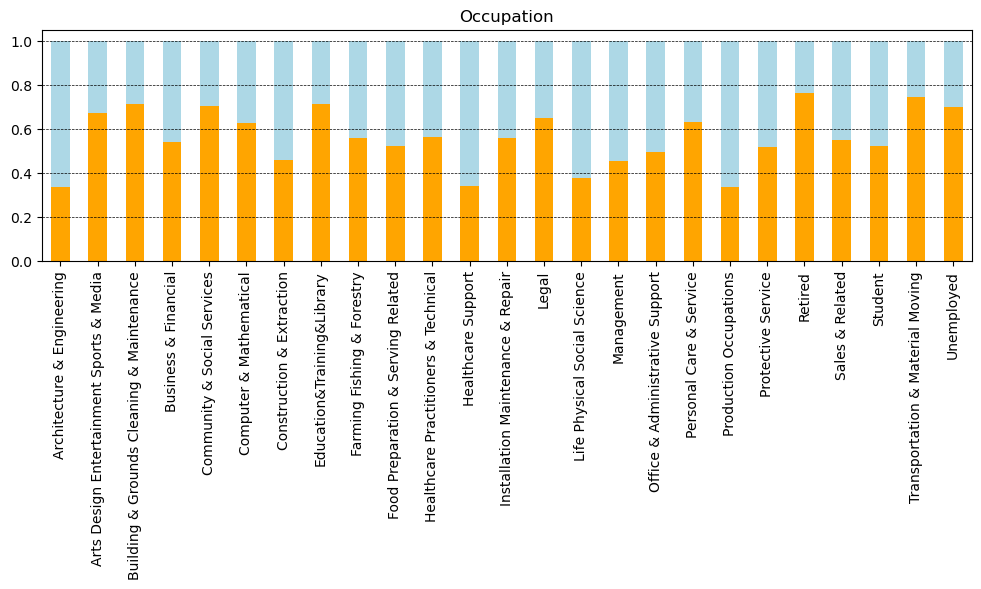

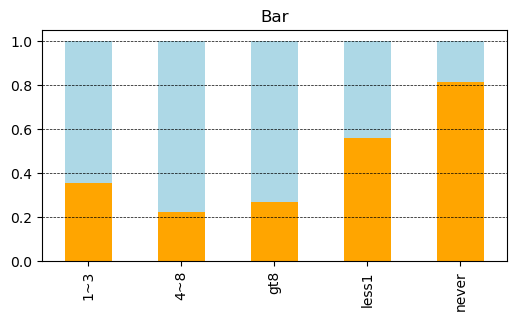

In [117]:
#For Bar Coupon we can create bar graph for the Acceptance frequency all variables
import matplotlib.patches as mpatches

d1 = pd.crosstab(bar_coupons.destination,bar_coupons.Y, normalize='index')
d2 = pd.crosstab(bar_coupons.passanger,bar_coupons.Y, normalize='index')
d3 = pd.crosstab(bar_coupons.weather,bar_coupons.Y, normalize='index')
d4 = pd.crosstab(bar_coupons.temperature,bar_coupons.Y, normalize='index')
d5 = pd.crosstab(bar_coupons.time,bar_coupons.Y, normalize='index')
d6 = pd.crosstab(bar_coupons.expiration,bar_coupons.Y, normalize='index')
d7 = pd.crosstab(bar_coupons.gender,bar_coupons.Y, normalize='index')
d8 = pd.crosstab(bar_coupons.age,bar_coupons.Y, normalize='index')
d9 = pd.crosstab(bar_coupons.maritalStatus,bar_coupons.Y, normalize='index')
d10 = pd.crosstab(bar_coupons.has_children,bar_coupons.Y, normalize='index')
d11 = pd.crosstab(bar_coupons.education,bar_coupons.Y, normalize='index')
d12 = pd.crosstab(bar_coupons.income,bar_coupons.Y, normalize='index')
d13 = pd.crosstab(bar_coupons.occupation,bar_coupons.Y, normalize='index')
d14 = pd.crosstab(bar_coupons.Bar,bar_coupons.Y, normalize='index')

#Plot the Acceptance Frequency for each variable
colors = {0 : 'orange', 1 :'lightblue'}

fig, axs = plt.subplots(3, 4)
fig.suptitle ('Bar Coupon Response', fontsize = 15)

d1.plot(ax = axs[0,0], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Destination')
d2.plot(ax = axs[0,1], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Passenger')
d3.plot(ax = axs[0,2], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Weather')
d4.plot(ax = axs[0,3], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Temperature')
d5.plot(ax = axs[1,0], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Time')
d6.plot(ax = axs[1,1], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Expiration')
d7.plot(ax = axs[1,2], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Gender')
d8.plot(ax = axs[1,3], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Age')
d9.plot(ax = axs[2,0], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Marital Status')
d10.plot(ax = axs[2,1], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Has Children')
d11.plot(ax = axs[2,2], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Education')
d12.plot(ax = axs[2,3], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Income')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.8, top=0.88, wspace=0.3, hspace=0.6)

# Rotate x-axis labels and hide the xaxis in all subplots
for ax in axs.flat:
    ax.tick_params(axis='x', labelrotation=25)
    ax.set_xlabel('')
    ax.get_legend().remove()
    ax.grid(axis = 'y', color='black', linestyle='--', linewidth=0.5)

blue_patch = mpatches.Patch(color='lightblue', label='Coupon Accepted')
orange_patch = mpatches.Patch(color='orange', label='Coupon NOT Accepted')
plt.legend(handles=[blue_patch, orange_patch], bbox_to_anchor=(1, 1))

d13.plot(kind= 'bar', stacked = True, color = colors, figsize=(12,3), title = 'Occupation')
plt.tick_params(axis='x', labelrotation=90)
plt.xlabel('')
plt.legend().remove()
plt.grid(axis = 'y', color='black', linestyle='--', linewidth=0.5)

d14.plot(kind= 'bar', stacked = True, color = colors, figsize=(6,3), title = 'Bar')
plt.tick_params(axis='x', labelrotation=90)
plt.xlabel('')
plt.legend().remove()
plt.grid(axis = 'y', color='black', linestyle='--', linewidth=0.5);


## Bar Coupons: Acceptance is around (41%)  
### The following variables have above %41 impact on Bar coupon acceptance rates:

1. **Destination**: Home
2. **Passenger**: Friend(s)
3. **Weather**: Sunny
4. **Time**: 10PM, 6PM
5. **Gender**: Male
6. **Age**: 21, 26, 41
7. **Marital Status**: Single
8. **Has Children**: No
9. **Education**: Some High School
10. **Income**: 100000 or More, 12550 - 24999, 25000 - 37499, Less than $12500
11. **Occupation**: Architecture & Engineering, Business & Financial, Construction & Extraction, Farming Fishing & Forestry, Food Preparation & Serving Related, Healthcare Practitioners & Technical, Healthcare Support, Life Physical Social Science, Management, Office & Administrative Support, Production Occupations, Sales & Related, Student
12. **Bar**: less1, 1-3, 4-8, gt8

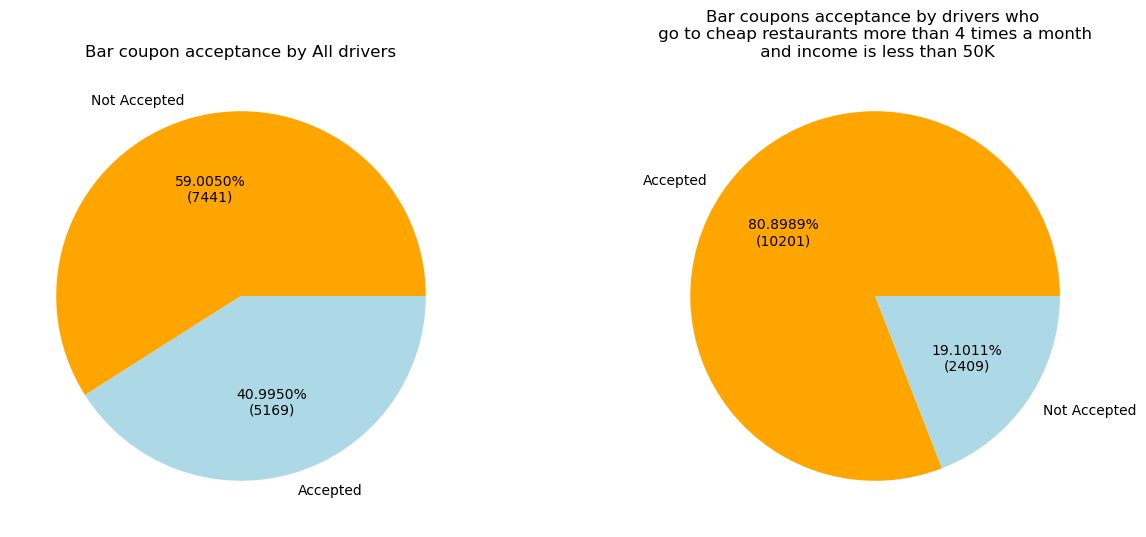

In [119]:
#Plot both pie charts side by side

plt.figure(figsize=(15, 6))
labels = ['Not Accepted', 'Accepted']
colours = {'Not Accepted': 'orange', 'Accepted': 'lightblue'}

plt.subplot(121)
#create pie chart
v_counts = bar_coupons.Y.value_counts().rename(index = row_names)
plt.pie(v_counts, labels=v_counts.index, colors = [colours[key] for key in labels], autopct=my_fmt)
plt.title('Bar coupon acceptance by All drivers')

plt.subplot(122)

#List of All drivers who went to a bar 3 or fewer times a month
filter1 = ["1~3", "4~8", "gt8"]
filter2 = ["Some High School"]
filter3 = ["Architecture & Engineering" , "Construction & Extraction", "Healthcare Support", "Life Physical Social Science", "Management", "Production Occupations" ]

bar_filtered = bar_coupons.query('Bar == @filter1 and occupation == @filter3 ')


v_counts = bar_filtered .Y.value_counts().rename(index = row_names)

#create pie chart
plt.pie(v_counts, labels=v_counts.index, colors = [colours[key] for key in labels], autopct=my_fmt)
plt.title('Bar coupons acceptance by drivers who \n go to cheap restaurants more than 4 times a month \n and income is less than 50K');

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

# Coffee Hourse Coupon


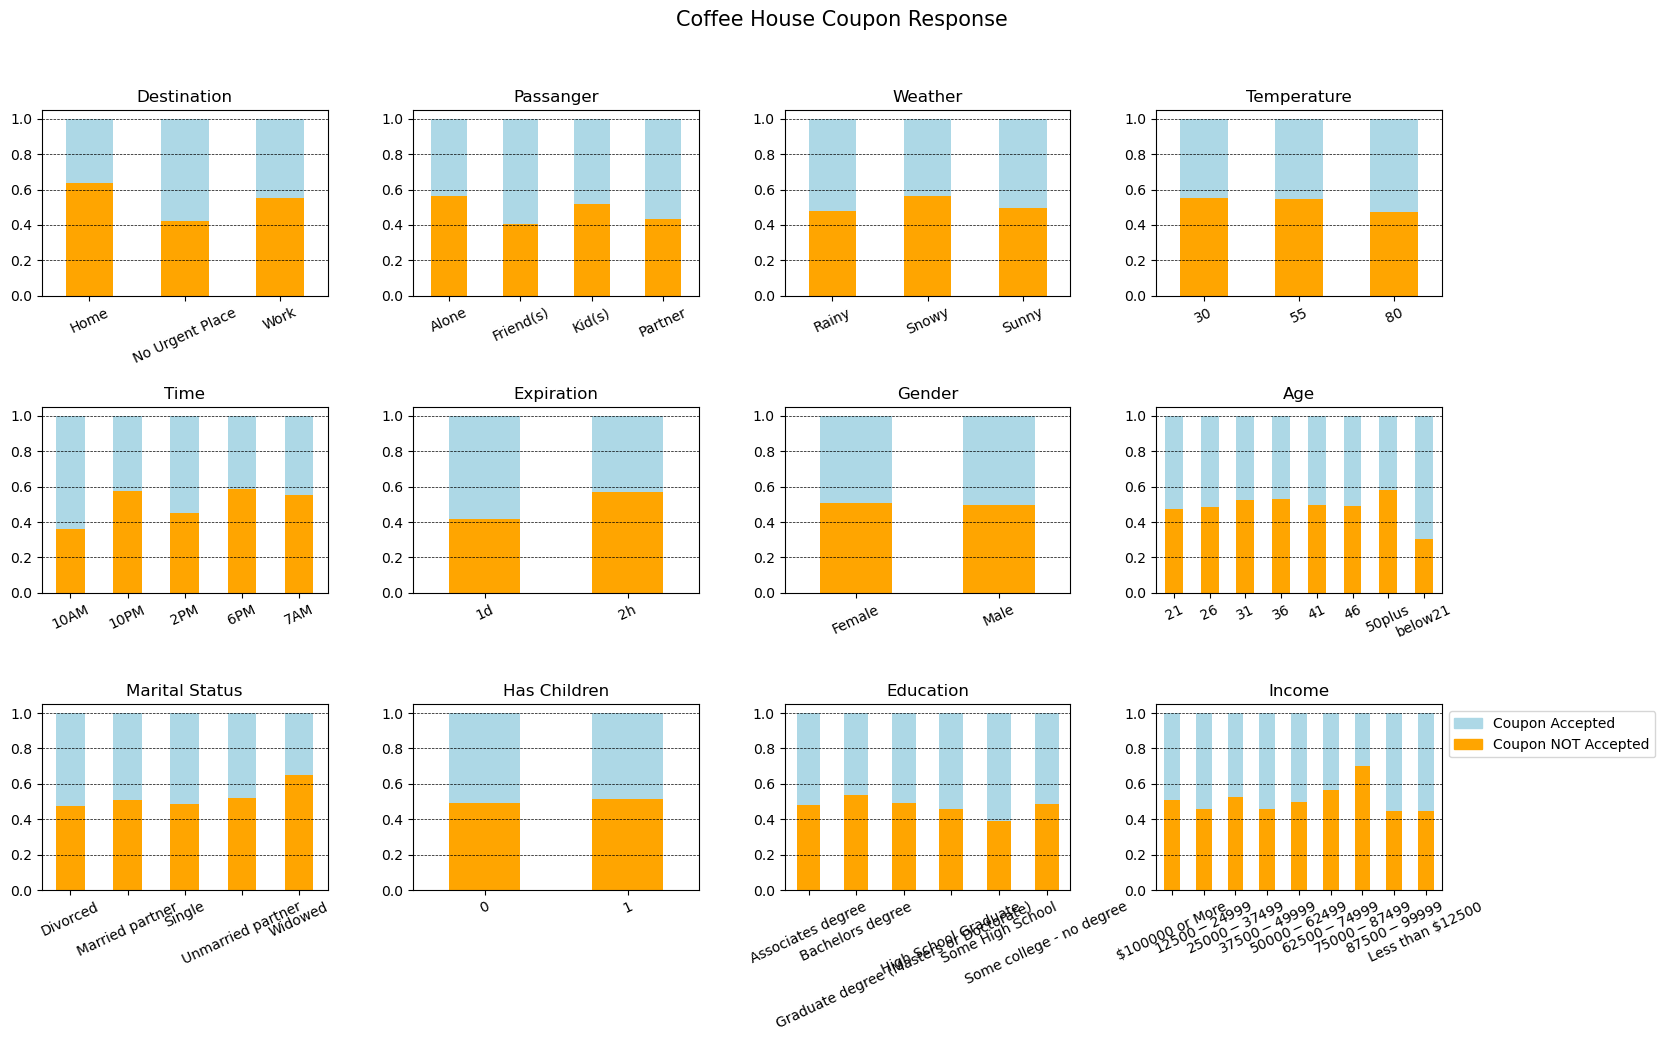

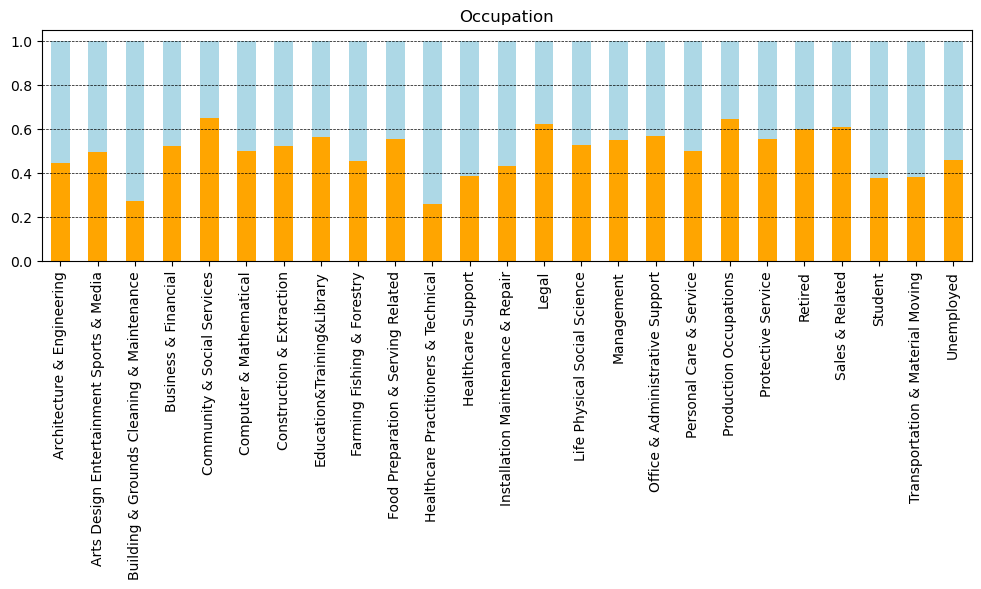

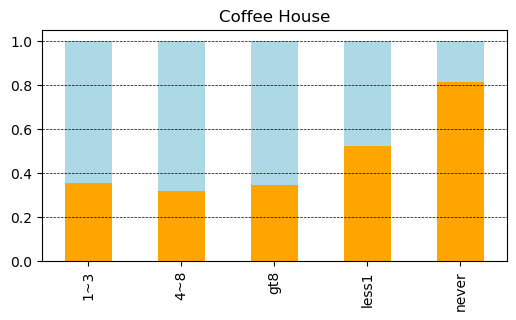

In [122]:
Coupons = data.query('coupon == "Coffee House"')
d1 = pd.crosstab(Coupons.destination,Coupons.Y, normalize='index')
d2 = pd.crosstab(Coupons.passanger,Coupons.Y, normalize='index')
d3 = pd.crosstab(Coupons.weather,Coupons.Y, normalize='index')
d4 = pd.crosstab(Coupons.temperature,Coupons.Y, normalize='index')
d5 = pd.crosstab(Coupons.time,Coupons.Y, normalize='index')
d6 = pd.crosstab(Coupons.expiration,Coupons.Y, normalize='index')
d7 = pd.crosstab(Coupons.gender,Coupons.Y, normalize='index')
d8 = pd.crosstab(Coupons.age,Coupons.Y, normalize='index')
d9 = pd.crosstab(Coupons.maritalStatus,Coupons.Y, normalize='index')
d10 = pd.crosstab(Coupons.has_children,Coupons.Y, normalize='index')
d11 = pd.crosstab(Coupons.education,Coupons.Y, normalize='index')
d12 = pd.crosstab(Coupons.income,Coupons.Y, normalize='index')
d13 = pd.crosstab(Coupons.occupation,Coupons.Y, normalize='index')
d14 = pd.crosstab(Coupons.CoffeeHouse,Coupons.Y, normalize='index')

#Plot the Acceptance Frequency for each variable
colors = {0 : 'orange', 1 :'lightblue'}

fig, axs = plt.subplots(3, 4)
fig.suptitle ('Coffee House Coupon Response', fontsize = 15)

d1.plot(ax = axs[0,0], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Destination')
d2.plot(ax = axs[0,1], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Passanger')
d3.plot(ax = axs[0,2], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Weather')
d4.plot(ax = axs[0,3], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Temperature')
d5.plot(ax = axs[1,0], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Time')
d6.plot(ax = axs[1,1], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Expiration')
d7.plot(ax = axs[1,2], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Gender')
d8.plot(ax = axs[1,3], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Age')
d9.plot(ax = axs[2,0], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Marital Status')
d10.plot(ax = axs[2,1], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Has Children')
d11.plot(ax = axs[2,2], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Education')
d12.plot(ax = axs[2,3], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Income')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.8, top=0.88, wspace=0.3, hspace=0.6)

# Rotate x-axis labels and hide the xaxis in all subplots
for ax in axs.flat:
    ax.tick_params(axis='x', labelrotation=25)
    ax.set_xlabel('')
    ax.get_legend().remove()
    ax.grid(axis = 'y', color='black', linestyle='--', linewidth=0.5)

blue_patch = mpatches.Patch(color='lightblue', label='Coupon Accepted')
orange_patch = mpatches.Patch(color='orange', label='Coupon NOT Accepted')
plt.legend(handles=[blue_patch, orange_patch], bbox_to_anchor=(1, 1))

d13.plot(kind= 'bar', stacked = True, color = colors, figsize=(12,3), title = 'Occupation')
plt.tick_params(axis='x', labelrotation=90)
plt.xlabel('')
plt.legend().remove()
plt.grid(axis = 'y', color='black', linestyle='--', linewidth=0.5)

d14.plot(kind= 'bar', stacked = True, color = colors, figsize=(6,3), title = 'Coffee House')
plt.tick_params(axis='x', labelrotation=90)
plt.xlabel('')
plt.legend().remove()
plt.grid(axis = 'y', color='black', linestyle='--', linewidth=0.5);

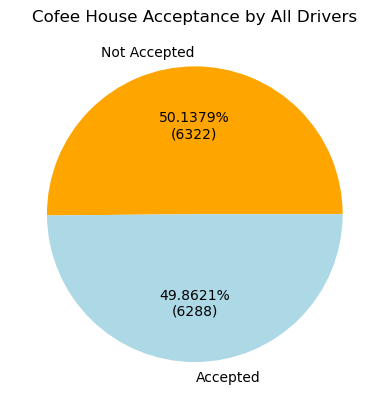

In [123]:
colors = sns.color_palette('pastel')[0:5]
#create pie chart
labels = ['Not Accepted', 'Accepted']
colours = {'Not Accepted': 'orange', 'Accepted': 'lightblue'}

v_counts = Coupons.Y.value_counts().rename(index = row_names)
plt.pie(v_counts, labels=v_counts.index, colors = [colours[key] for key in labels], autopct=my_fmt)
plt.title('Cofee House Acceptance by All Drivers');

## Coffee House Coupons: Acceptance is around (50%)  
### The following variables have above %50 impact on coffee house coupon acceptance rates:

1. **Destination**:  No Urgent Place
2. **Passenger**: Friend(s), Partner
3. **Time**: 10AM, 2PM
4. **Expiration**: 1d
5. **Gender**: Male
6. **Age**: below21
7. **Education**: Some High School
8. **Income**: 12550 - 24999, 87500 - 99999, Less than $12500
9. **Occupation**: Architecture & Engineering, Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry, Healthcare Practitioners & Technical, Student, Transportation & Material
10. **CoffeeHouse**: 1-3, 4-8, gt8

 # Restaurant(<20) Coupon

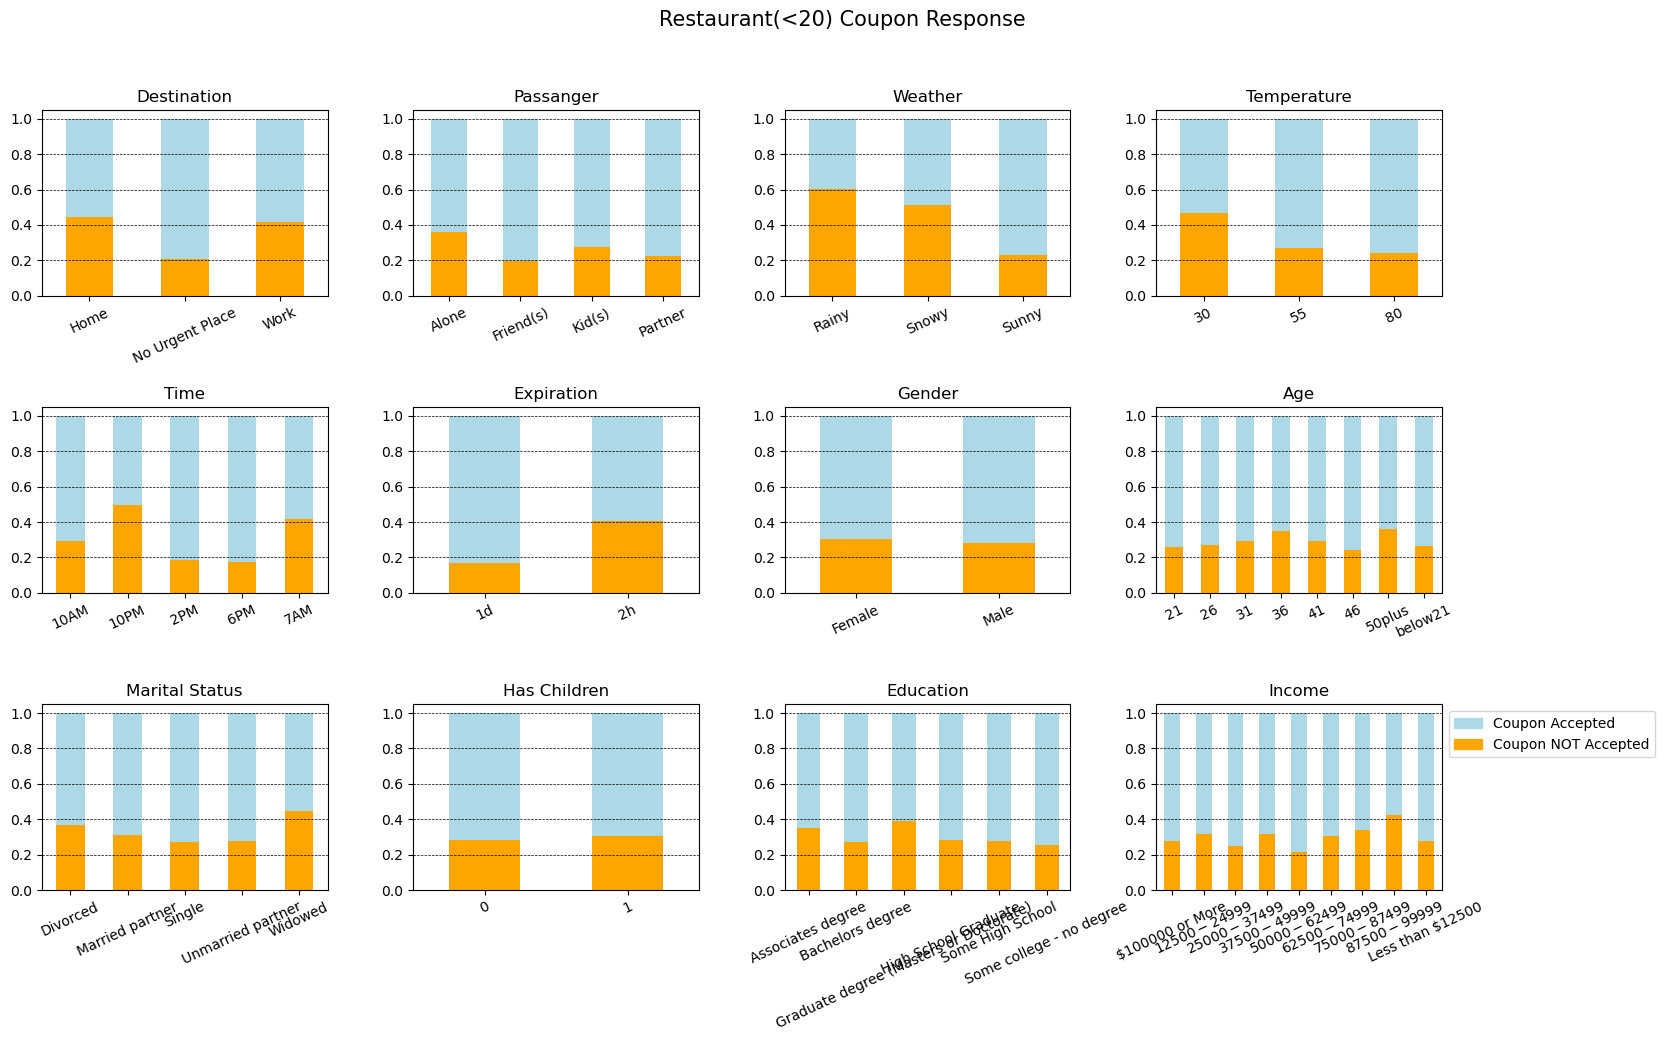

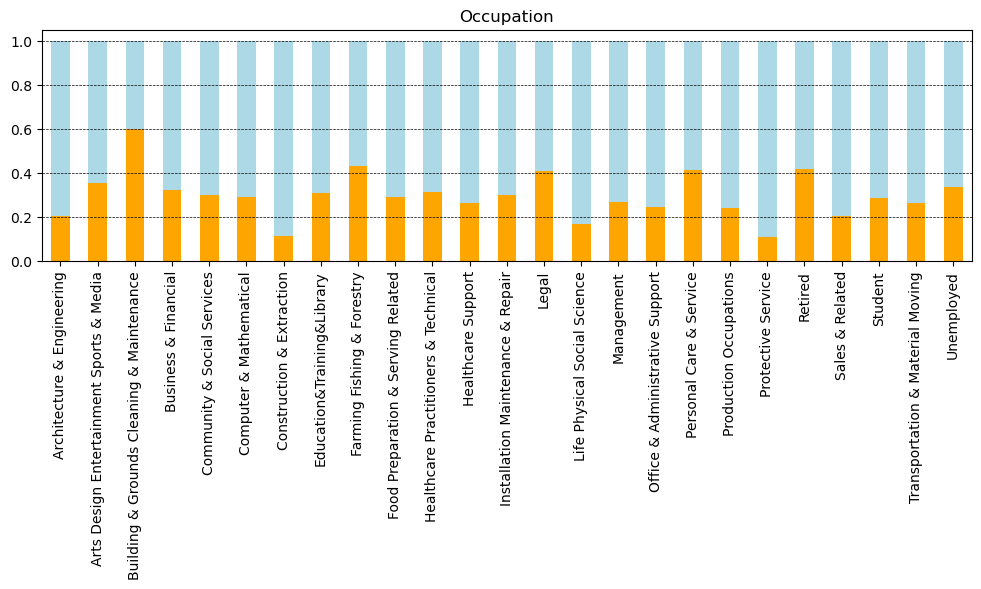

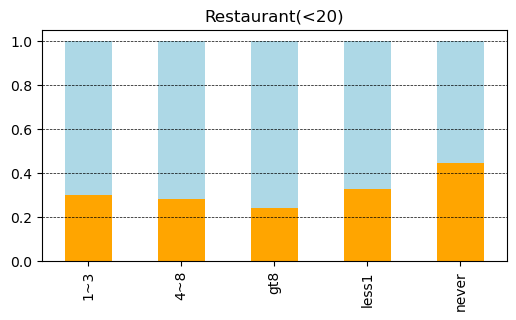

In [124]:
Coupons = data.query('coupon == "Restaurant(<20)"')
d1 = pd.crosstab(Coupons.destination,Coupons.Y, normalize='index')
d2 = pd.crosstab(Coupons.passanger,Coupons.Y, normalize='index')
d3 = pd.crosstab(Coupons.weather,Coupons.Y, normalize='index')
d4 = pd.crosstab(Coupons.temperature,Coupons.Y, normalize='index')
d5 = pd.crosstab(Coupons.time,Coupons.Y, normalize='index')
d6 = pd.crosstab(Coupons.expiration,Coupons.Y, normalize='index')
d7 = pd.crosstab(Coupons.gender,Coupons.Y, normalize='index')
d8 = pd.crosstab(Coupons.age,Coupons.Y, normalize='index')
d9 = pd.crosstab(Coupons.maritalStatus,Coupons.Y, normalize='index')
d10 = pd.crosstab(Coupons.has_children,Coupons.Y, normalize='index')
d11 = pd.crosstab(Coupons.education,Coupons.Y, normalize='index')
d12 = pd.crosstab(Coupons.income,Coupons.Y, normalize='index')
d13 = pd.crosstab(Coupons.occupation,Coupons.Y, normalize='index')
d14 = pd.crosstab(Coupons.RestaurantLessThan20,Coupons.Y, normalize='index')

#Plot the Acceptance Frequency for each variable
colors = {0 : 'orange', 1 :'lightblue'}

fig, axs = plt.subplots(3, 4)
fig.suptitle ('Restaurant(<20) Coupon Response', fontsize = 15)

d1.plot(ax = axs[0,0], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Destination')
d2.plot(ax = axs[0,1], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Passanger')
d3.plot(ax = axs[0,2], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Weather')
d4.plot(ax = axs[0,3], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Temperature')
d5.plot(ax = axs[1,0], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Time')
d6.plot(ax = axs[1,1], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Expiration')
d7.plot(ax = axs[1,2], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Gender')
d8.plot(ax = axs[1,3], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Age')
d9.plot(ax = axs[2,0], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Marital Status')
d10.plot(ax = axs[2,1], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Has Children')
d11.plot(ax = axs[2,2], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Education')
d12.plot(ax = axs[2,3], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Income')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.8, top=0.88, wspace=0.3, hspace=0.6)

# Rotate x-axis labels and hide the xaxis in all subplots
for ax in axs.flat:
    ax.tick_params(axis='x', labelrotation=25)
    ax.set_xlabel('')
    ax.get_legend().remove()
    ax.grid(axis = 'y', color='black', linestyle='--', linewidth=0.5)

blue_patch = mpatches.Patch(color='lightblue', label='Coupon Accepted')
orange_patch = mpatches.Patch(color='orange', label='Coupon NOT Accepted')
plt.legend(handles=[blue_patch, orange_patch], bbox_to_anchor=(1, 1))

d13.plot(kind= 'bar', stacked = True, color = colors, figsize=(12,3), title = 'Occupation')
plt.tick_params(axis='x', labelrotation=90)
plt.xlabel('')
plt.legend().remove()
plt.grid(axis = 'y', color='black', linestyle='--', linewidth=0.5)

d14.plot(kind= 'bar', stacked = True, color = colors, figsize=(6,3), title = 'Restaurant(<20)')
plt.tick_params(axis='x', labelrotation=90)
plt.xlabel('')
plt.legend().remove()
plt.grid(axis = 'y', color='black', linestyle='--', linewidth=0.5);

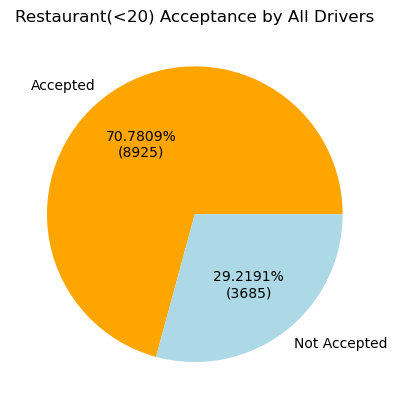

In [125]:
labels = ['Not Accepted', 'Accepted']
colours = {'Not Accepted': 'orange', 'Accepted': 'lightblue'}

#create pie chart
v_counts = Coupons.Y.value_counts().rename(index = row_names)
plt.pie(v_counts, labels=v_counts.index, colors = [colours[key] for key in labels], autopct=my_fmt)
plt.title('Restaurant(<20) Acceptance by All Drivers');

## Restaurant(<20) Coupons: Acceptance is around (71%)  
### The following variables have above %71 impact on coffee house coupon acceptance rates:

1. **Destination**:  No Urgent Place
2. **Passenger**: Friend(s), Partner
3. **Weather**: Sunny
4. **Temperature**: 80
5. **Time**: 2PM, 6PM
6. **Expiration**: 1d
7. **Age**: 46
8. **Income**: 25000 - 37499, 50000 - 62499
9. **Occupation**: Architecture & Engineering, Construction & Extraction, Life Physical Social Science, Office & Administrative Support, Production Occupations, Protective Service, Sales & Related
10. **Restaurant(<20)**: gt8


 # Carry out & Take away Coupon

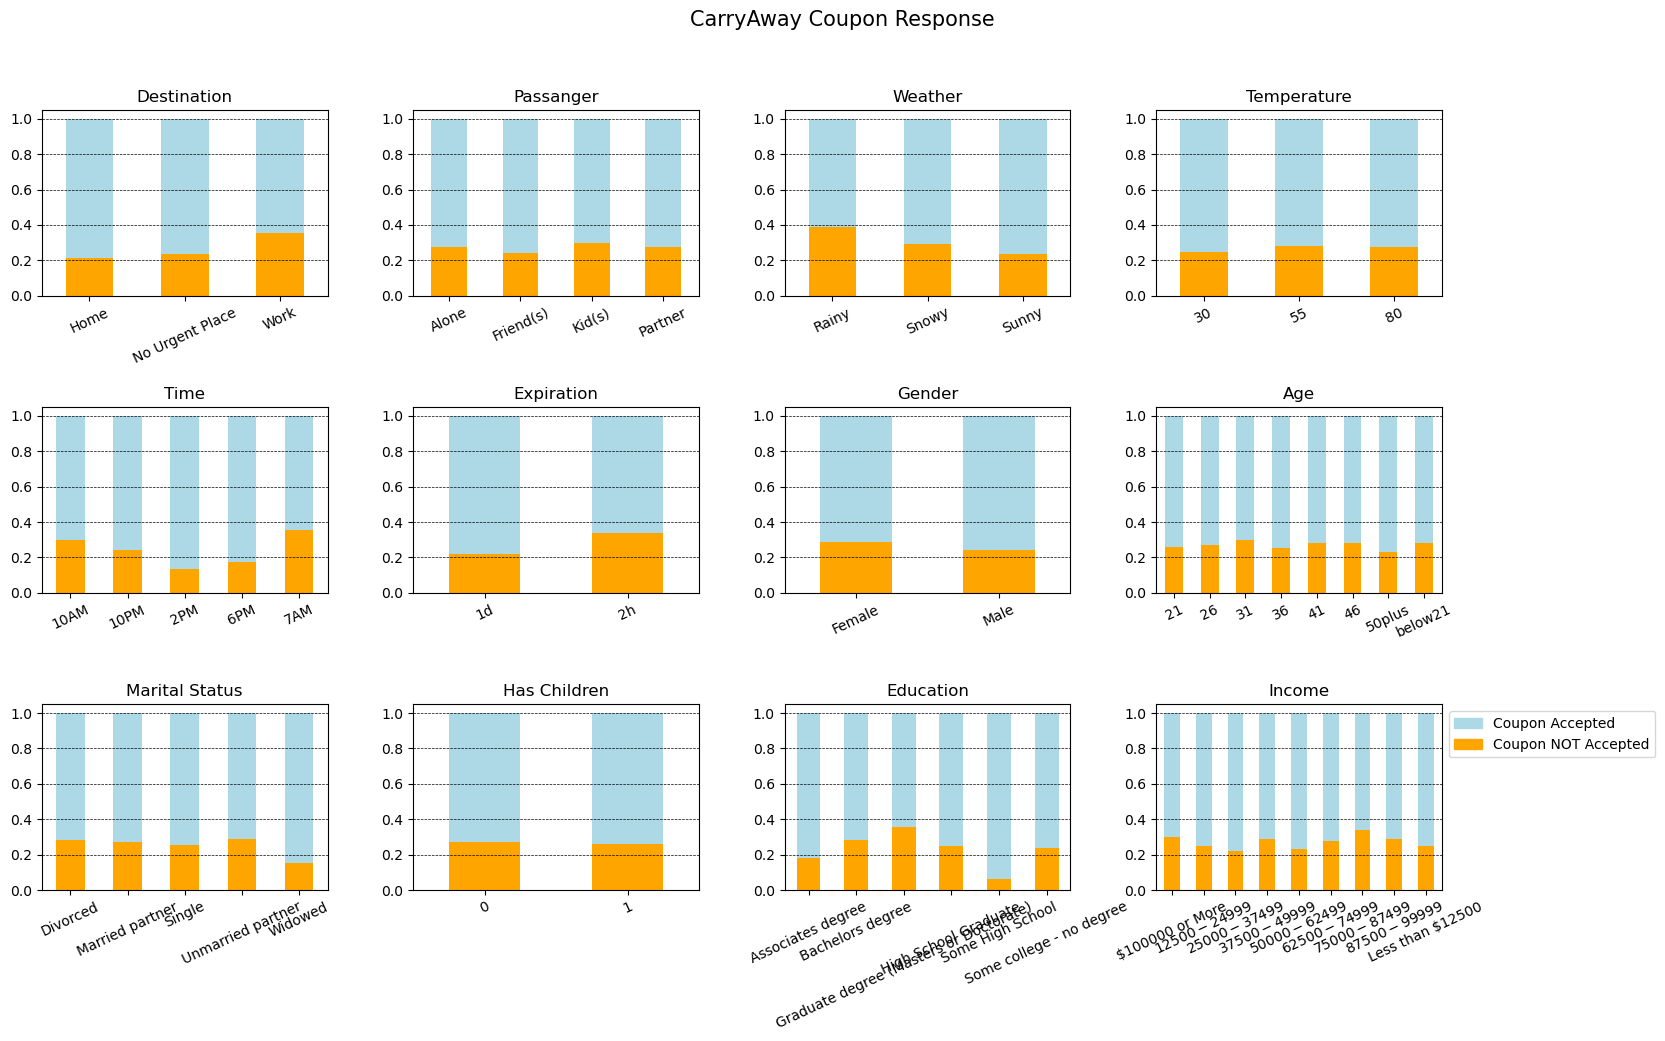

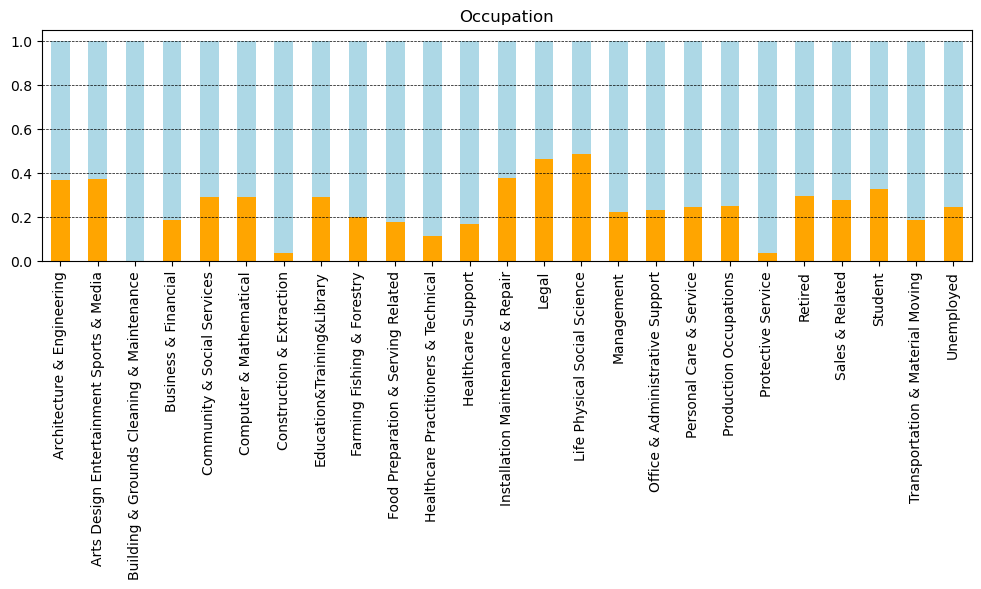

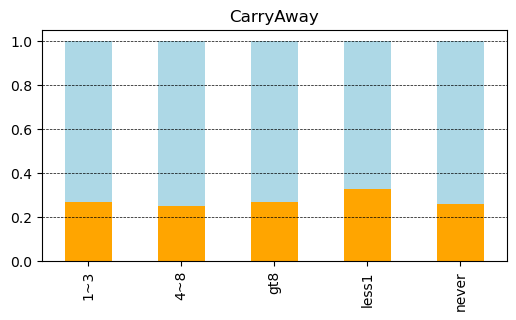

In [126]:
Coupons = data.query('coupon == "Carry out & Take away"')
d1 = pd.crosstab(Coupons.destination,Coupons.Y, normalize='index')
d2 = pd.crosstab(Coupons.passanger,Coupons.Y, normalize='index')
d3 = pd.crosstab(Coupons.weather,Coupons.Y, normalize='index')
d4 = pd.crosstab(Coupons.temperature,Coupons.Y, normalize='index')
d5 = pd.crosstab(Coupons.time,Coupons.Y, normalize='index')
d6 = pd.crosstab(Coupons.expiration,Coupons.Y, normalize='index')
d7 = pd.crosstab(Coupons.gender,Coupons.Y, normalize='index')
d8 = pd.crosstab(Coupons.age,Coupons.Y, normalize='index')
d9 = pd.crosstab(Coupons.maritalStatus,Coupons.Y, normalize='index')
d10 = pd.crosstab(Coupons.has_children,Coupons.Y, normalize='index')
d11 = pd.crosstab(Coupons.education,Coupons.Y, normalize='index')
d12 = pd.crosstab(Coupons.income,Coupons.Y, normalize='index')
d13 = pd.crosstab(Coupons.occupation,Coupons.Y, normalize='index')
d14 = pd.crosstab(Coupons.CarryAway,Coupons.Y, normalize='index')

#Plot the Acceptance Frequency for each variable
colors = {0 : 'orange', 1 :'lightblue'}

fig, axs = plt.subplots(3, 4)
fig.suptitle ('CarryAway Coupon Response', fontsize = 15)

d1.plot(ax = axs[0,0], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Destination')
d2.plot(ax = axs[0,1], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Passanger')
d3.plot(ax = axs[0,2], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Weather')
d4.plot(ax = axs[0,3], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Temperature')
d5.plot(ax = axs[1,0], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Time')
d6.plot(ax = axs[1,1], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Expiration')
d7.plot(ax = axs[1,2], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Gender')
d8.plot(ax = axs[1,3], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Age')
d9.plot(ax = axs[2,0], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Marital Status')
d10.plot(ax = axs[2,1], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Has Children')
d11.plot(ax = axs[2,2], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Education')
d12.plot(ax = axs[2,3], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Income')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.8, top=0.88, wspace=0.3, hspace=0.6)

# Rotate x-axis labels and hide the xaxis in all subplots
for ax in axs.flat:
    ax.tick_params(axis='x', labelrotation=25)
    ax.set_xlabel('')
    ax.get_legend().remove()
    ax.grid(axis = 'y', color='black', linestyle='--', linewidth=0.5)

blue_patch = mpatches.Patch(color='lightblue', label='Coupon Accepted')
orange_patch = mpatches.Patch(color='orange', label='Coupon NOT Accepted')
plt.legend(handles=[blue_patch, orange_patch], bbox_to_anchor=(1, 1))

d13.plot(kind= 'bar', stacked = True, color = colors, figsize=(12,3), title = 'Occupation')
plt.tick_params(axis='x', labelrotation=90)
plt.xlabel('')
plt.legend().remove()
plt.grid(axis = 'y', color='black', linestyle='--', linewidth=0.5)

d14.plot(kind= 'bar', stacked = True, color = colors, figsize=(6,3), title = 'CarryAway')
plt.tick_params(axis='x', labelrotation=90)
plt.xlabel('')
plt.legend().remove()
plt.grid(axis = 'y', color='black', linestyle='--', linewidth=0.5);

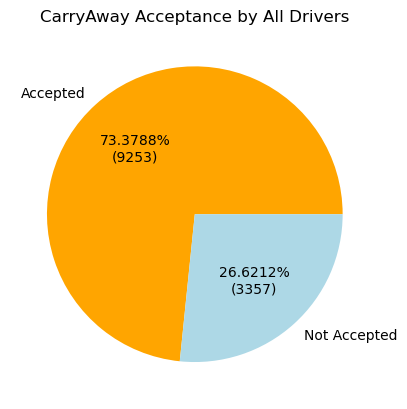

In [127]:
labels = ['Not Accepted', 'Accepted']
colours = {'Not Accepted': 'orange', 'Accepted': 'lightblue'}

#create pie chart
v_counts = Coupons.Y.value_counts().rename(index = row_names)
plt.pie(v_counts, labels=v_counts.index, colors = [colours[key] for key in labels], autopct=my_fmt)
plt.title('CarryAway Acceptance by All Drivers');

## Carry out & Take Coupons: Acceptance is around (73%)  
### The following variables have above %73 impact on coffee house coupon acceptance rates:

1. **Destination**:  Home, No Urgent Place
2. **Passenger**: Friend(s)
3. **Weather**: Sunny
4. **Temperature**: 30
5. **Time**: 2PM, 6PM
6. **Expiration**: 1d
7. **Gender**: Male
8. **Age**: 50plus
9. **Marital Status**: Widowed
10. **Education**: Associate degree, Some High School, some college,- no degree
11. **Income**: 25000 - 37499, 50000 - 62499
12. **Occupation**: Building & Grounds Cleaning & Maintenance, Business & Financial, Construction & Extraction, Farming Fishing & Forestry, Food Preparation & Serving Related, Healthcare Practitioners & Technical, Healthcare Support,Management, Protective Service, Transportation & Material Moving

 # Restaurant(20-50) away Coupon

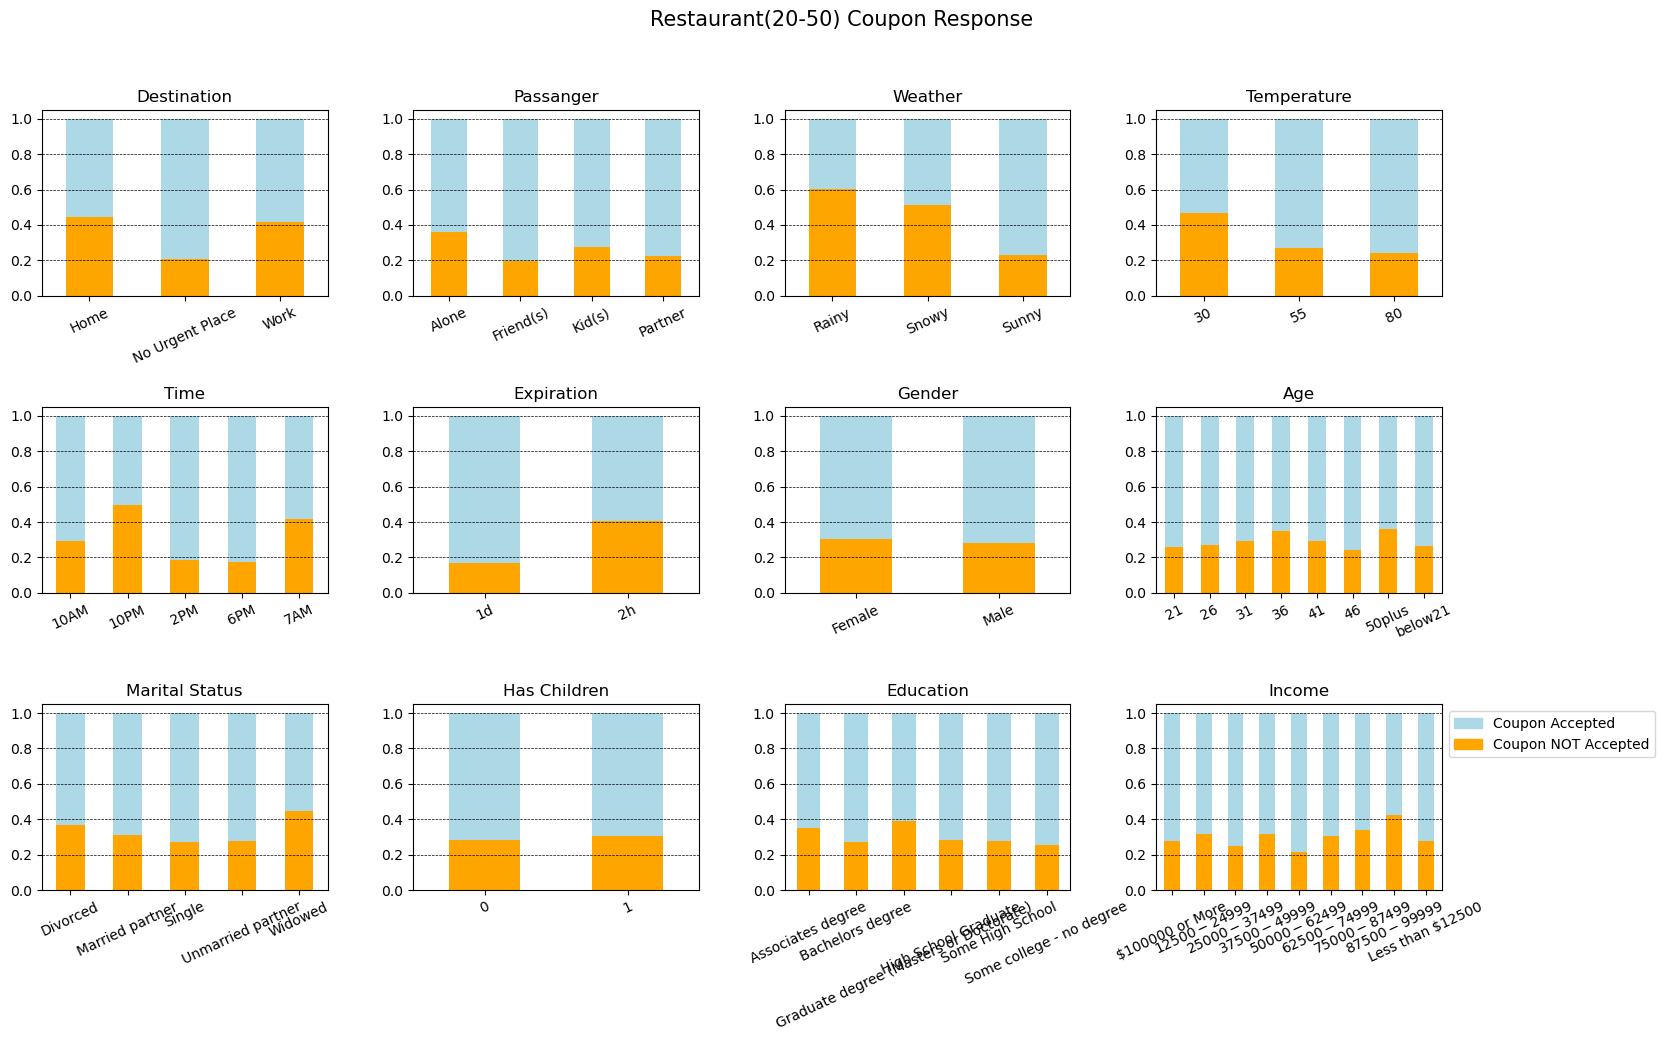

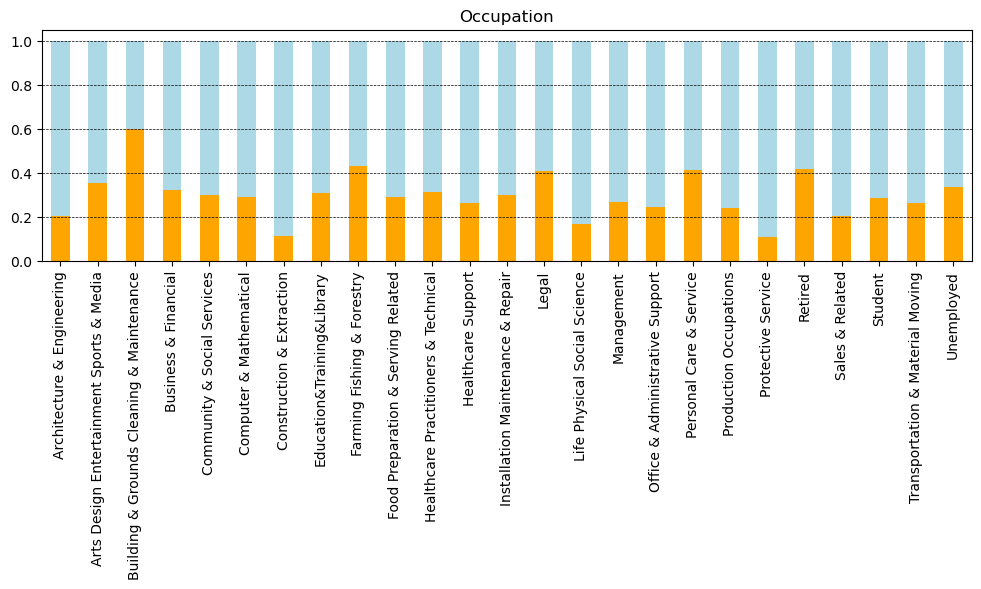

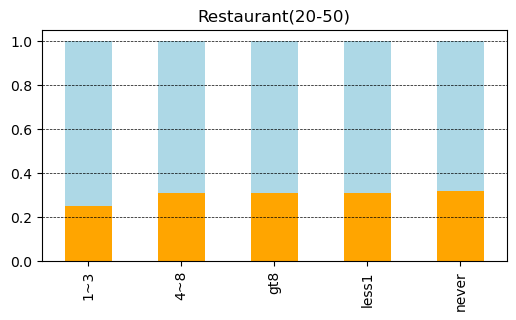

In [129]:
Coupons = data.query('coupon == "Restaurant(<20)"')
d1 = pd.crosstab(Coupons.destination,Coupons.Y, normalize='index')
d2 = pd.crosstab(Coupons.passanger,Coupons.Y, normalize='index')
d3 = pd.crosstab(Coupons.weather,Coupons.Y, normalize='index')
d4 = pd.crosstab(Coupons.temperature,Coupons.Y, normalize='index')
d5 = pd.crosstab(Coupons.time,Coupons.Y, normalize='index')
d6 = pd.crosstab(Coupons.expiration,Coupons.Y, normalize='index')
d7 = pd.crosstab(Coupons.gender,Coupons.Y, normalize='index')
d8 = pd.crosstab(Coupons.age,Coupons.Y, normalize='index')
d9 = pd.crosstab(Coupons.maritalStatus,Coupons.Y, normalize='index')
d10 = pd.crosstab(Coupons.has_children,Coupons.Y, normalize='index')
d11 = pd.crosstab(Coupons.education,Coupons.Y, normalize='index')
d12 = pd.crosstab(Coupons.income,Coupons.Y, normalize='index')
d13 = pd.crosstab(Coupons.occupation,Coupons.Y, normalize='index')
d14 = pd.crosstab(Coupons.Restaurant20To50,Coupons.Y, normalize='index')

#Plot the Acceptance Frequency for each variable
colors = {0 : 'orange', 1 :'lightblue'}

fig, axs = plt.subplots(3, 4)
fig.suptitle ('Restaurant(20-50) Coupon Response', fontsize = 15)

d1.plot(ax = axs[0,0], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Destination')
d2.plot(ax = axs[0,1], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Passanger')
d3.plot(ax = axs[0,2], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Weather')
d4.plot(ax = axs[0,3], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Temperature')
d5.plot(ax = axs[1,0], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Time')
d6.plot(ax = axs[1,1], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Expiration')
d7.plot(ax = axs[1,2], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Gender')
d8.plot(ax = axs[1,3], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Age')
d9.plot(ax = axs[2,0], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Marital Status')
d10.plot(ax = axs[2,1], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Has Children')
d11.plot(ax = axs[2,2], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Education')
d12.plot(ax = axs[2,3], kind= 'bar', stacked = True, color = colors, figsize=(20,10), title = 'Income')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.8, top=0.88, wspace=0.3, hspace=0.6)

# Rotate x-axis labels and hide the xaxis in all subplots
for ax in axs.flat:
    ax.tick_params(axis='x', labelrotation=25)
    ax.set_xlabel('')
    ax.get_legend().remove()
    ax.grid(axis = 'y', color='black', linestyle='--', linewidth=0.5)

blue_patch = mpatches.Patch(color='lightblue', label='Coupon Accepted')
orange_patch = mpatches.Patch(color='orange', label='Coupon NOT Accepted')
plt.legend(handles=[blue_patch, orange_patch], bbox_to_anchor=(1, 1))

d13.plot(kind= 'bar', stacked = True, color = colors, figsize=(12,3), title = 'Occupation')
plt.tick_params(axis='x', labelrotation=90)
plt.xlabel('')
plt.legend().remove()
plt.grid(axis = 'y', color='black', linestyle='--', linewidth=0.5)

d14.plot(kind= 'bar', stacked = True, color = colors, figsize=(6,3), title = 'Restaurant(20-50)')
plt.tick_params(axis='x', labelrotation=90)
plt.xlabel('')
plt.legend().remove()
plt.grid(axis = 'y', color='black', linestyle='--', linewidth=0.5);

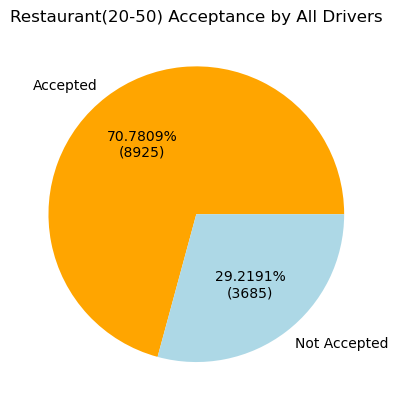

In [131]:
labels = ['Not Accepted', 'Accepted']
colours = {'Not Accepted': 'orange', 'Accepted': 'lightblue'}

#create pie chart
v_counts = Coupons.Y.value_counts().rename(index = row_names)
plt.pie(v_counts, labels=v_counts.index, colors = [colours[key] for key in labels], autopct=my_fmt)
plt.title('Restaurant(20-50) Acceptance by All Drivers');

## Restaurant(20-50) Coupons: Acceptance is around (71%)  
 The following variables have above %71 impact on coffee house coupon acceptance rates:

1. **Destination**: No Urgent Place
2. **Passenger**: Friend(s), Partner
3. **Weather**: Sunny
4. **Time**: 2PM, 6PM
5. **Expiration**: 1d
6. **Age**: 46
7. **Income**: 50000 - 62499
8. **Occupation**: Architecture & Engineering, Construction & Extraction, Life Physical Social Science, Protective Service, Sales & Related
9.  **Restaurant(20-50)**:  1-3